Посчитать tpr и fpr в ноутбуке с лекции. 
Убедиться, что график ROC AUC получается таким же, как и штатными средствами


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
X = data[data.columns[:-1]]
Y = data['affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [4]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)
model.score(X_test, Y_test)
fpr_auto, tpr_auto, thres = roc_curve(Y_test, predictions[:, 1])

In [5]:
TPR_manual = []
FPR_manual = []
Thres = np.linspace(1.0, 0.0, num=100, endpoint=False)
for threshold in Thres:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip(predictions[:, 1], Y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    TPR_manual.append(tp / (tp + fn))
    FPR_manual.append(fp / (fp + tn))

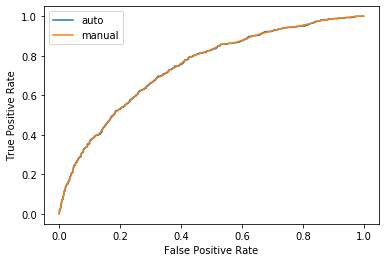

In [9]:
plt.plot(fpr_auto, tpr_auto, label = 'auto')
plt.plot(FPR_manual, TPR_manual, label = 'manual')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [7]:
print(f'auc_score: {roc_auc_score(Y_test, predictions[:, 1])}')

auc_score: 0.7451629176618145


In [92]:
square_roc = 0
for i in range(len(FPR_manual) - 1):
    square_roc += 0.5 * (TPR_manual[i+1] + TPR_manual[i]) * (FPR_manual[i+1] - FPR_manual[i])
print('Area under curve: ', square_roc)

Area under curve:  0.7453443517114857
